In [1]:
from pyosrd.schedules import Schedule

In [2]:
two_trains = Schedule(6, 2)

two_trains.df.at[0, 0] = [0, 1]
two_trains.df.at[2, 0] = [1, 2]
two_trains.df.at[3, 0] = [2, 3]
two_trains.df.at[4, 0] = [3, 4]

two_trains.df.at[1, 1] = [1, 2]
two_trains.df.at[2, 1] = [2, 3]
two_trains.df.at[3, 1] = [3, 4]
two_trains.df.at[5, 1] = [4, 5]


<Axes: xlabel='Time'>

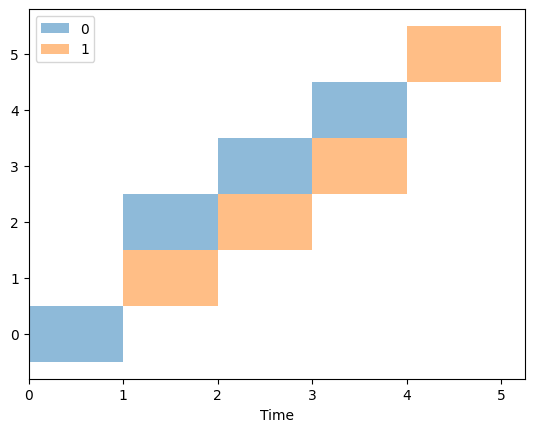

In [3]:
two_trains.plot()

In [4]:
delayed_schedule = (
    two_trains
    .shift_train_departure(train=0, time=3)
    .add_delay(train=1, block=1, delay=.5)
)

assert delayed_schedule.train_delay(0, two_trains) == 3.0
assert delayed_schedule.train_delay(1, two_trains) == 0.5

<Axes: xlabel='Time'>

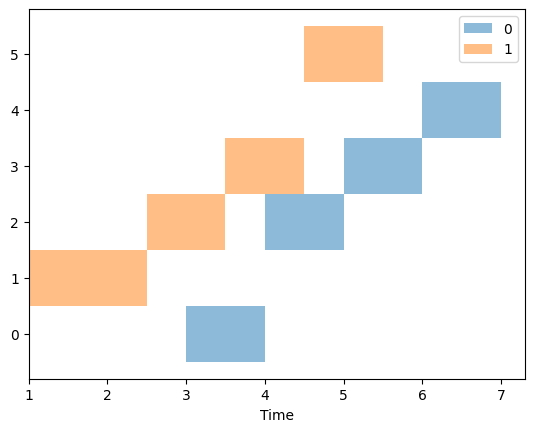

In [5]:
delayed_schedule.plot()

In [7]:
two_trains._mermaid_graph

/home/renan/RLway/src/pyosrd/schedules/schedules.py:430: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  for u, v in zip(self.df.index, self.df.fillna(0).values)


'graph LR;2-->3;3-->4;3-->5;0-->2;1-->2'